In [1]:
from numpy import mean ,std
import numpy as np
from sklearn.model_selection import cross_val_score , cross_validate ,RepeatedKFold ,GridSearchCV ,train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingRegressor ,RandomForestRegressor , GradientBoostingRegressor
from sklearn.metrics import r2_score ,mean_absolute_error
from sklearn.neural_network import MLPRegressor
from matplotlib import pyplot
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import pandas as pd
import csv
import matplotlib.pyplot as plt
import joblib
import lightgbm as lgb
from ipynb.fs.full.set_up import data_prep

In [2]:
models_list = {
    'CatBoostRegressor': CatBoostRegressor(logging_level='Silent'),
    'XGBRegressor': XGBRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'LinearRegression': LinearRegression(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
#     'LGBMRegressor': lgb.LGBMRegressor()
}

# Update best_params dictionary with additional model parameters
# best_params = {
#     'RandomForestRegressor': {'bootstrap': True, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200},
#     'CatBoostRegressor': {'depth': 10, 'iterations': 1500, 'l2_leaf_reg': 9, 'learning_rate': 0.05},
#     'XGBRegressor': {'learning_rate': 0.07, 'max_depth': 5, 'n_estimators': 150},
#     'LinearRegression': {'fit_intercept': True, 'positive': True},
#     'GradientBoostingRegressor': {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3},
# #     'LGBMRegressor': {'boosting_type': 'gbdt', 'num_leaves': 30, 'learning_rate': 0.1, 'n_estimators': 200}
# }

# best_params = {
#     'RandomForestRegressor': {'bootstrap': True, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100},
#     'CatBoostRegressor': {'depth': 3, 'iterations': 500, 'l2_leaf_reg': 3, 'learning_rate': 0.05},
#     'XGBRegressor': {'learning_rate': 0.07, 'max_depth': 3, 'n_estimators': 50},
#     'LinearRegression': {'fit_intercept': True, 'positive': True},
#     'GradientBoostingRegressor': {'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 3},
# #     'LGBMRegressor': {'boosting_type': 'gbdt', 'num_leaves': 30, 'learning_rate': 0.1, 'n_estimators': 50}
# }


params = {
    'CatBoostRegressor': {'iterations': [1000, 1200],'learning_rate': [0.01,0.05],'depth': [8,10],'l2_leaf_reg': [3,9]},
    'RandomForestRegressor': {'bootstrap': [True, False],'max_depth': [5, 10, 15],'max_features': ['auto', 'sqrt'],'min_samples_leaf': [1, 2, 4],'n_estimators': [100, 150, 200],'min_samples_split': [2, 5, 10]},
    'XGBRegressor': {'learning_rate': [0.07, 0.1, 0.15],'max_depth': [5, 7, 10],'n_estimators': [150, 200, 250],'max_leaves':[2,3,4]},
    'LinearRegression': {'fit_intercept': [True, False], 'positive': [True, False]},
    'GradientBoostingRegressor': {'n_estimators': [100,200,300], 'learning_rate': [0.1,0.2,0.3], 'max_depth': [3,5,7]},
    'LGBMRegressor': {'boosting_type': ['gbdt'], 'num_leaves': [10, 20, 30], 'learning_rate': [0.1, 0.2, 0.3], 'n_estimators': [100, 200, 300]}
}





Prep
(54392, 26)
Tuning CatBoostRegressor
Best parameters: {'depth': 8, 'iterations': 1200, 'l2_leaf_reg': 3, 'learning_rate': 0.05}
Tuning XGBRegressor
Best parameters: {'learning_rate': 0.07, 'max_depth': 7, 'max_leaves': 2, 'n_estimators': 200}
Tuning RandomForestRegressor


C:\Users\yoavl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1620 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1379 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yoavl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yoavl\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\yoavl\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\yoavl\anaconda3\lib\site-pac

Best parameters: {'bootstrap': False, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Tuning LinearRegression
Best parameters: {'fit_intercept': True, 'positive': False}
Tuning GradientBoostingRegressor
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


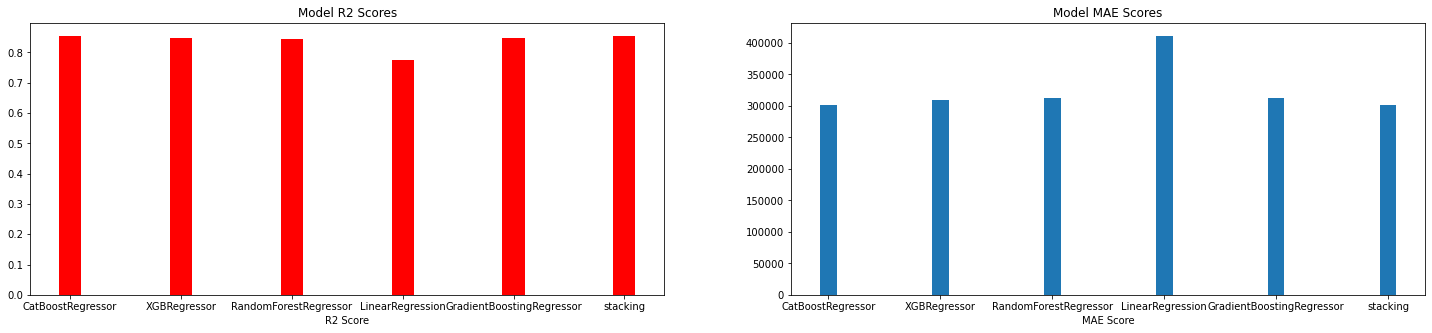

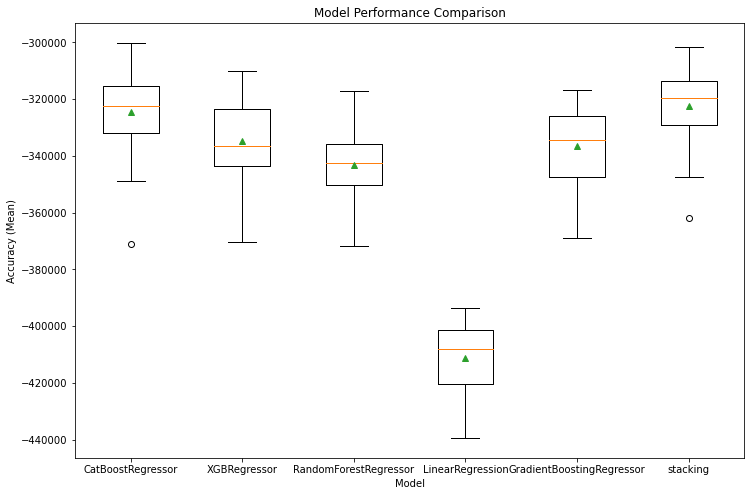

In [3]:
def get_models_with_best_params(best_params):
    models = dict()
    models['CatBoostRegressor'] = CatBoostRegressor(**best_params['CatBoostRegressor'], logging_level='Silent')
    models['XGBRegressor'] = XGBRegressor(**best_params['XGBRegressor'])
    models['RandomForestRegressor'] = RandomForestRegressor(**best_params['RandomForestRegressor'])
    models['LinearRegression'] = LinearRegression(**best_params['LinearRegression'])
    models['GradientBoostingRegressor'] = GradientBoostingRegressor(**best_params['GradientBoostingRegressor'])
#     models['LGBMRegressor'] = lgb.LGBMRegressor(**best_params['LGBMRegressor'])

    models['stacking'] = get_stacking(best_params)
    return models


def get_stacking(params):
    level0 = []
    level0.append(('CatBoostRegressor', CatBoostRegressor(**params['CatBoostRegressor'], logging_level='Silent'))) 
    level0.append(('RandomForestRegressor', RandomForestRegressor(**params['RandomForestRegressor'])))
    level0.append(('XGBRegressor', XGBRegressor(**params['XGBRegressor'])))
    level0.append(('LinearRegression', LinearRegression(**params['LinearRegression'])))
    level0.append(('GradientBoostingRegressor', GradientBoostingRegressor(**params['GradientBoostingRegressor'])))
#     level0.append(('LGBMRegressor', lgb.LGBMRegressor(**params['LGBMRegressor'])))

     # define meta-learner model
    level1 = LinearRegression(**params['LinearRegression'])

    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model
 
def find_best_params(models , X_train_selected ,y_train ):
    best_params = {}
    
    for name, model in models.items():
        print("Tuning", name)
        clf = GridSearchCV(model, params[name], cv=10, n_jobs=-1)
        clf.fit(X_train_selected, y_train)
        best_params[name] = clf.best_params_
        print("Best parameters:", best_params[name])
        
    return best_params
 
    
def evaluate_model(model,X_train_scaled, X_test_scaled  ,y_train, y_test):
    
    model_train = model.fit(X_train_scaled , y_train)
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
    results_score = cross_val_score(model_train, X_test_scaled, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1  )

    y_pred = model_train.predict(X_test_scaled)
        
    r2 = r2_score(y_test, y_pred)
    mae_score = mean_absolute_error(y_test, y_pred)

    return {
        'accuracy': {'mean': mean(results_score), 'std': std(results_score)},
        'r2_score': r2,
        'mae_score': mae_score,
        'results_score': results_score,
        'y_pred': y_pred,
        'model': model_train
    }


X_train_scaled,  X_test_scaled  ,y_train, y_test , X_train, X_test = data_prep(start_year = 2003 , min_price = 1200000 ,max_price =7000000 )

best_params = find_best_params(models_list , X_train_scaled ,y_train )


models = get_models_with_best_params(best_params)


# evaluate the models and store results
scores = {}
saved_models = {}
for name, model in models.items():
    score = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    scores[name] = score
    saved_models[name] = model  
    
joblib.dump(saved_models, 'saved_models.pkl')    
    
def result_plot(scores):
    res_scores = []
    model_names = []

    for model_name, model_scores in scores.items():
        res_scores.append(scores[model_name]['results_score'])
        model_names.append(model_name)
    fig, ax = plt.subplots(figsize=(12,8))
    ax.boxplot(res_scores, labels=model_names, showmeans=True)
    ax.set_xlabel('Model')
    ax.set_ylabel('Accuracy (Mean)')
    ax.set_title('Model Performance Comparison')
    plt.show()
    
    
def plot_model_scores(scores):
    r2_scores = []
    mae_scores = []
    model_names = []

    for model_name, model_scores in scores.items():
        r2_scores.append(model_scores['r2_score'])
        mae_scores.append(model_scores['mae_score'])
        model_names.append(model_name)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 5))
    ax1.bar(model_names, r2_scores ,width=0.2 , color = 'Red')
    ax1.set_xlabel('R2 Score')
    ax1.set_title('Model R2 Scores')

    ax2.bar(model_names, mae_scores , width=0.15)
    ax2.set_xlabel('MAE Score')
    ax2.set_title('Model MAE Scores')

    plt.show()
    
plot_model_scores(scores)
result_plot(scores)


In [4]:
def predict_test_data(df, scores):
    y = df['Price']
    X = df.drop('Price', axis=1)
    
    scaler = joblib.load('scaler.pkl')
    X_scaled = scaler.transform(X)
    df_predict_dict = {}
    
    for model_name, model_scores in scores.items():
        y_pred = scores[model_name]['model'].predict(X_scaled)
        y_pred = y_pred *1.00
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        df_predict = pd.DataFrame({'Price': y, 'predicted price': y_pred , 'diff': y - y_pred })
        pos_count = len(df_predict[df_predict['diff'] > 0])
        neg_count = len(df_predict[df_predict['diff'] < 0])
        
        df_predict['diff'] = df_predict['diff'].astype(int)
        df_predict['predicted price'] = df_predict['predicted price'].astype(int)

        df_predict_dict[model_name] = df_predict
        print(f'{model_name}\nr2_score: {r2} , mae: {int(mae)}')
        print(f"pos_count:{pos_count} ,neg_count:{neg_count}\n")
    return df_predict_dict

yad2_df , item_id = data_prep(yad2 = True , accuracy = 0 ,min_price = 1200000 ,max_price =6000000) 


yad_2_results = predict_test_data(yad2_df,scores)

# yad_2_results['stacking']


Prep
(1012, 30)
CatBoostRegressor
r2_score: 0.5099647509200966 , mae: 549147
pos_count:502 ,neg_count:262

XGBRegressor
r2_score: 0.5031659132758215 , mae: 551250
pos_count:498 ,neg_count:266

RandomForestRegressor
r2_score: 0.5445705904785085 , mae: 530040
pos_count:555 ,neg_count:209

LinearRegression
r2_score: 0.4823682003401287 , mae: 562187
pos_count:423 ,neg_count:341

GradientBoostingRegressor
r2_score: 0.5273548300067372 , mae: 541509
pos_count:473 ,neg_count:291

stacking
r2_score: 0.5477353262959462 , mae: 528083
pos_count:498 ,neg_count:266



In [21]:
def predict_data(df, model ,item_id):
    y = df['Price']
    X = df.drop('Price', axis=1)

    scaler = joblib.load('scaler.pkl')
    X_scaled = scaler.transform(X)
    
    y_pred = model.predict(X_scaled)
    y_pred = y_pred *1.00
    df["Predicted"] = y_pred
    df["Predicted"] = df["Predicted"].astype(np.int32)
    df['Difference'] =  df["Price"] -  df["Predicted"] 
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f'r2_score: {r2} , mae: {mae}')
    df['Item_id'] = item_id
    df["Predicted"] = df["Predicted"].astype(np.int32)
    df["Difference"] = df["Difference"].astype(np.int32)

    return df.sort_values(by="Difference")

yad2_df , item_id = data_prep(yad2 = True , accuracy = 0 ,min_price = 1200000 ,max_price =6000000) 

models = joblib.load('saved_models.pkl')
model = models['stacking']

yad_2_results = predict_data(yad2_df,model, item_id)


Prep
(1012, 30)
r2_score: 0.5477353262959462 , mae: 528083.771819381


In [27]:
df = pd.read_csv("../Data/yad_2_data.csv")

def final_data(df , algo_data):
    merged_df = pd.merge(df, algo_data, on='Item_id', how='inner')
    merged_df.index += 1
    merged_df = merged_df.drop_duplicates(subset='Item_id')
    merged_df = merged_df.sort_values(by="Difference")

    return merged_df

# cols = ['Text']
# merged_df.drop(columns = cols, inplace = True)
merged_df = final_data(df, yad2_df)
merged_df.to_csv('../Data/Predicted_DB.csv') 
merged_df

,Price_x,Street,Neighborhood,Parking,Balconies,Size_x,Floors_x,Asset_classification,Ac,Furniture,...,Floors_y,Year,Age,Neighborhood_rank,Street_rank,Gush_rank,Helka_rank,New,Predicted,Difference
8,"3,300,000 ₪",החלוצים,פלורנטין,ללא,3.0,100.0,4.0,2.0,1.0,0.0,...,4,2023,73,56175,66666,64835,63989,0,5847770,-2547770
306,"2,800,000 ₪",אייר,"עזרא, הארגזים",ללא,1.0,100.0,1.0,2.0,1.0,0.0,...,1,2023,53,31955,47846,63496,49557,0,5068302,-2268302
58,"3,480,000 ₪",הלפיד,קרית שלום,ללא,2.0,180.0,1.0,5.0,0.0,0.0,...,1,2023,53,35355,42561,37882,38157,0,5567544,-2087544
295,"2,550,000 ₪","מזא""ה","לב תל אביב, לב העיר צפון",ללא,1.0,232.0,4.0,2.0,1.0,0.0,...,4,2023,83,58862,47806,12173,41597,0,4578431,-2028431
192,"3,600,000 ₪",הגולן,רמת החייל,ללא,0.0,150.0,2.0,3.0,1.0,0.0,...,2,2023,83,46914,38467,46391,60107,0,5554115,-1954115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,"5,250,000 ₪",אברבנאל,פלורנטין,ללא,0.0,90.0,1.0,2.0,1.0,1.0,...,1,2023,15,56175,58720,61585,22443,0,2963319,2286681
111,"5,450,000 ₪",תרצה,"צפון יפו, המושבה האמריקאית-גרמנית",ללא,3.0,93.0,6.0,6.0,1.0,0.0,...,6,2023,17,45744,46470,65528,12455,1,3049871,2400129
276,"5,000,000 ₪",וכטנגוב,"מכללת תל אביב יפו, דקר",1,1.0,98.0,6.0,6.0,1.0,0.0,...,6,2023,8,30693,10786,21500,40038,1,2530952,2469048
587,"4,400,000 ₪",בבלי,בבלי,1,1.0,57.0,12.0,1.0,1.0,0.0,...,12,2023,54,62089,43956,43956,22424,1,1704047,2695953


In [25]:
madlan_df , item_id = data_prep(madlan = True , accuracy = 0 ,min_price = 1200000 ,max_price =6000000) 


madlan_results = predict_data(madlan_df,model, item_id)
madlan_results = madlan_results.drop_duplicates()
madlan_results

Prep
(267, 28)
r2_score: 0.5988187970804094 , mae: 504846.8397496781


,Rooms,Floor,Size,Price,Build_year,Floors,Year,Age,Neighborhood_rank,Street_rank,Gush_rank,Helka_rank,New,Predicted,Difference,Item_id
187,3,2,95,2700000,1940,11,2023,83,51484,56205,51200,49222,0,4612560,-1912560,LuqLaO0n3fM
57,4,2,114,2730000,2024,5,2023,-1,51484,54831,40656,26745,0,4295814,-1565814,j6ltl1G5id6
269,4,1,95,3750000,2014,4,2023,9,51484,54831,51063,58482,0,5246713,-1496713,e5P6JJ7Jv9O
273,4,5,100,3800000,1982,5,2023,41,35661,54831,46721,54986,0,5213202,-1413202,dgEB7WquCZ8
215,4,9,98,4800000,1978,17,2023,45,61873,78571,51200,101686,0,6009519,-1209519,dTheLQSHOev
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,4,1,108,5750000,1982,5,2023,41,51484,30208,41947,49222,0,4074936,1675064,doXEXSjV8U8
102,3,4,75,5750000,1999,4,2023,24,51484,67278,66837,47400,1,4060879,1689121,jVGYlb8ZkFM
78,2,1,53,4900000,1960,2,2023,63,56680,54831,51200,60084,0,3131736,1768264,dWKc55jsCUf
90,4,2,90,4590000,1970,4,2023,53,40500,4815,38229,48967,0,2783914,1806086,tPZvnTpwDhS


In [26]:
df = pd.read_csv("../Data/madlan_data.csv")


merged_df = final_data(df,madlan_results)
merged_df

,Item_id,Lat,Long,City,Home_number,Street,Rooms_x,Neighborhood,Floor_x,Build_year_x,...,Floors,Year,Age,Neighborhood_rank,Street_rank,Gush_rank,Helka_rank,New,Predicted,Difference
149,LuqLaO0n3fM,32.065173,34.781171,תל אביב יפו,71,"מזא""ה",3.0,לב תל אביב,2.0,1940.0,...,11,2023,83,51484,56205,51200,49222,0,4612560,-1912560
50,j6ltl1G5id6,32.047319,34.808175,תל אביב יפו,5,תקוע,4.5,כפר שלם,2.0,2024.0,...,5,2023,-1,51484,54831,40656,26745,0,4295814,-1565814
210,e5P6JJ7Jv9O,32.047564,34.754336,תל אביב יפו,10,הייקל יוסף,4.0,מרכז יפו,1.0,2014.0,...,4,2023,9,51484,54831,51063,58482,0,5246713,-1496713
212,dgEB7WquCZ8,32.046890,34.778420,תל אביב יפו,17,יוחננוף כהן שמואל,4.0,קרית שלום,5.0,NaN,...,5,2023,41,35661,54831,46721,54986,0,5213202,-1413202
168,dTheLQSHOev,32.091031,34.794230,תל אביב יפו,72,פנקס,4.0,הצפון החדש סביבת כיכר המדינה,9.0,1978.0,...,17,2023,45,61873,78571,51200,101686,0,6009519,-1209519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,doXEXSjV8U8,32.111256,34.816224,תל אביב יפו,209,בני אפרים,4.0,מעוז אביב א,1.0,NaN,...,5,2023,41,51484,30208,41947,49222,0,4074936,1675064
83,jVGYlb8ZkFM,32.075393,34.779120,תל אביב יפו,13,שמריהו לוין,3.0,הצפון הישן החלק הדרום מזרחי,4.0,NaN,...,4,2023,24,51484,67278,66837,47400,1,4060879,1689121
65,dWKc55jsCUf,32.111328,34.800947,תל אביב יפו,3,ברודי,2.5,רמת אביב,1.0,NaN,...,2,2023,63,56680,54831,51200,60084,0,3131736,1768264
75,tPZvnTpwDhS,32.077524,34.800588,תל אביב יפו,13,זימן,4.0,נחלת יצחק,2.0,NaN,...,4,2023,53,40500,4815,38229,48967,0,2783914,1806086
